# Caelan Osman

## Feb 28, 2022

## Homework 14.2

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acovf
from statsmodels.api import OLS
from matplotlib import pyplot as plt

## Exercise 14.6

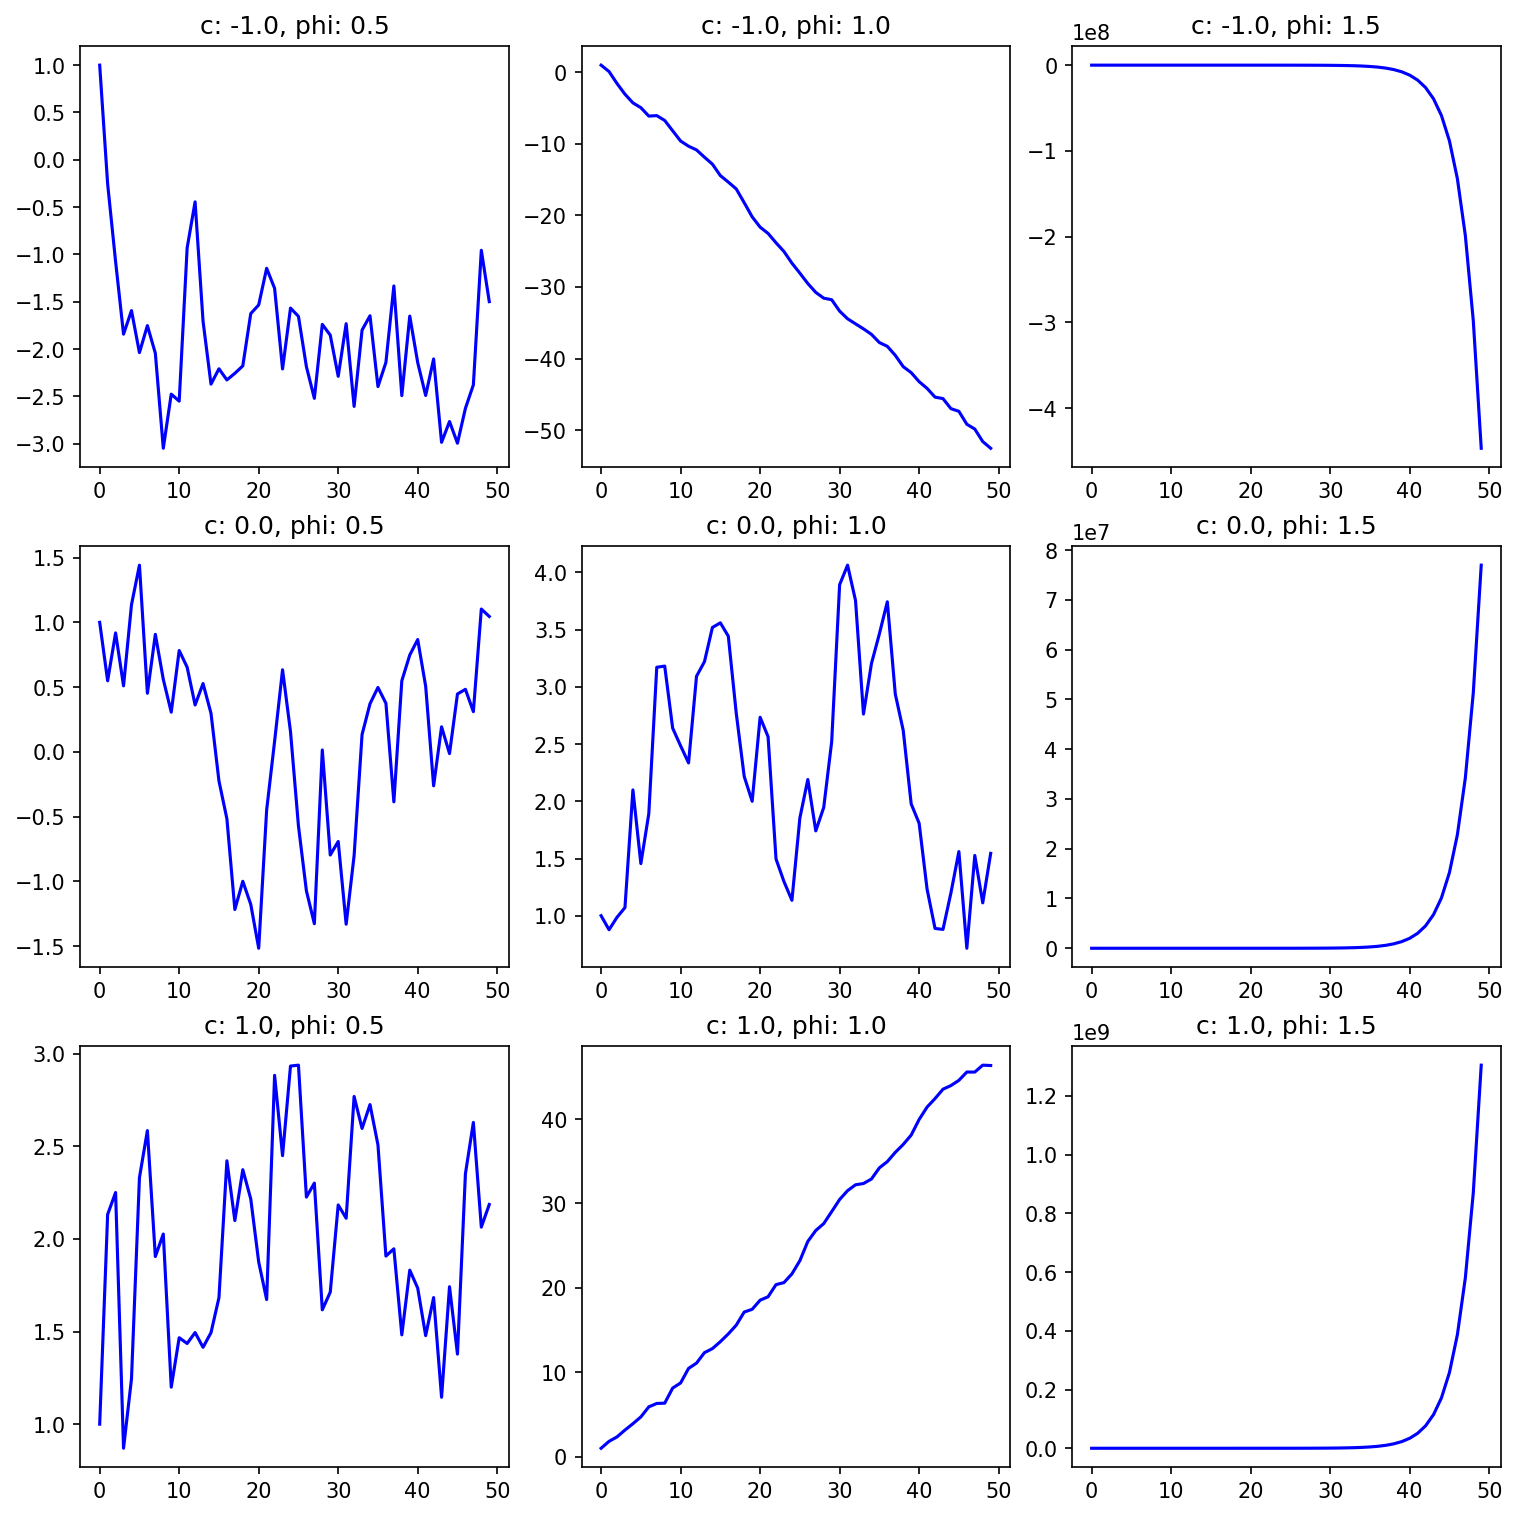

In [3]:
def problem14_6(T = 50):

    cs = [-1.0, 0., 1.0]
    phis = [0.5, 1.0, 1.5]

    fig, axs = plt.subplots(3, 3, constrained_layout=True, figsize=(10, 10))
    fig.set_dpi(150)

    Z0 = 1
    for i, c in enumerate(cs):
        for j, phi in enumerate(phis):
            Z = np.zeros(T)
            Z[0] = Z0
            for t in range(1, T):
                Z[t] = c + phi*Z[t-1] + np.random.normal(loc=0, scale=1/2.)

            ax = axs[i, j]

            ax.plot(Z, 'b-')
            ax.set_title('c: ' + str(c) + ', phi: ' + str(phi))
    plt.show()
    return
problem14_6()

## Exercise 14.7

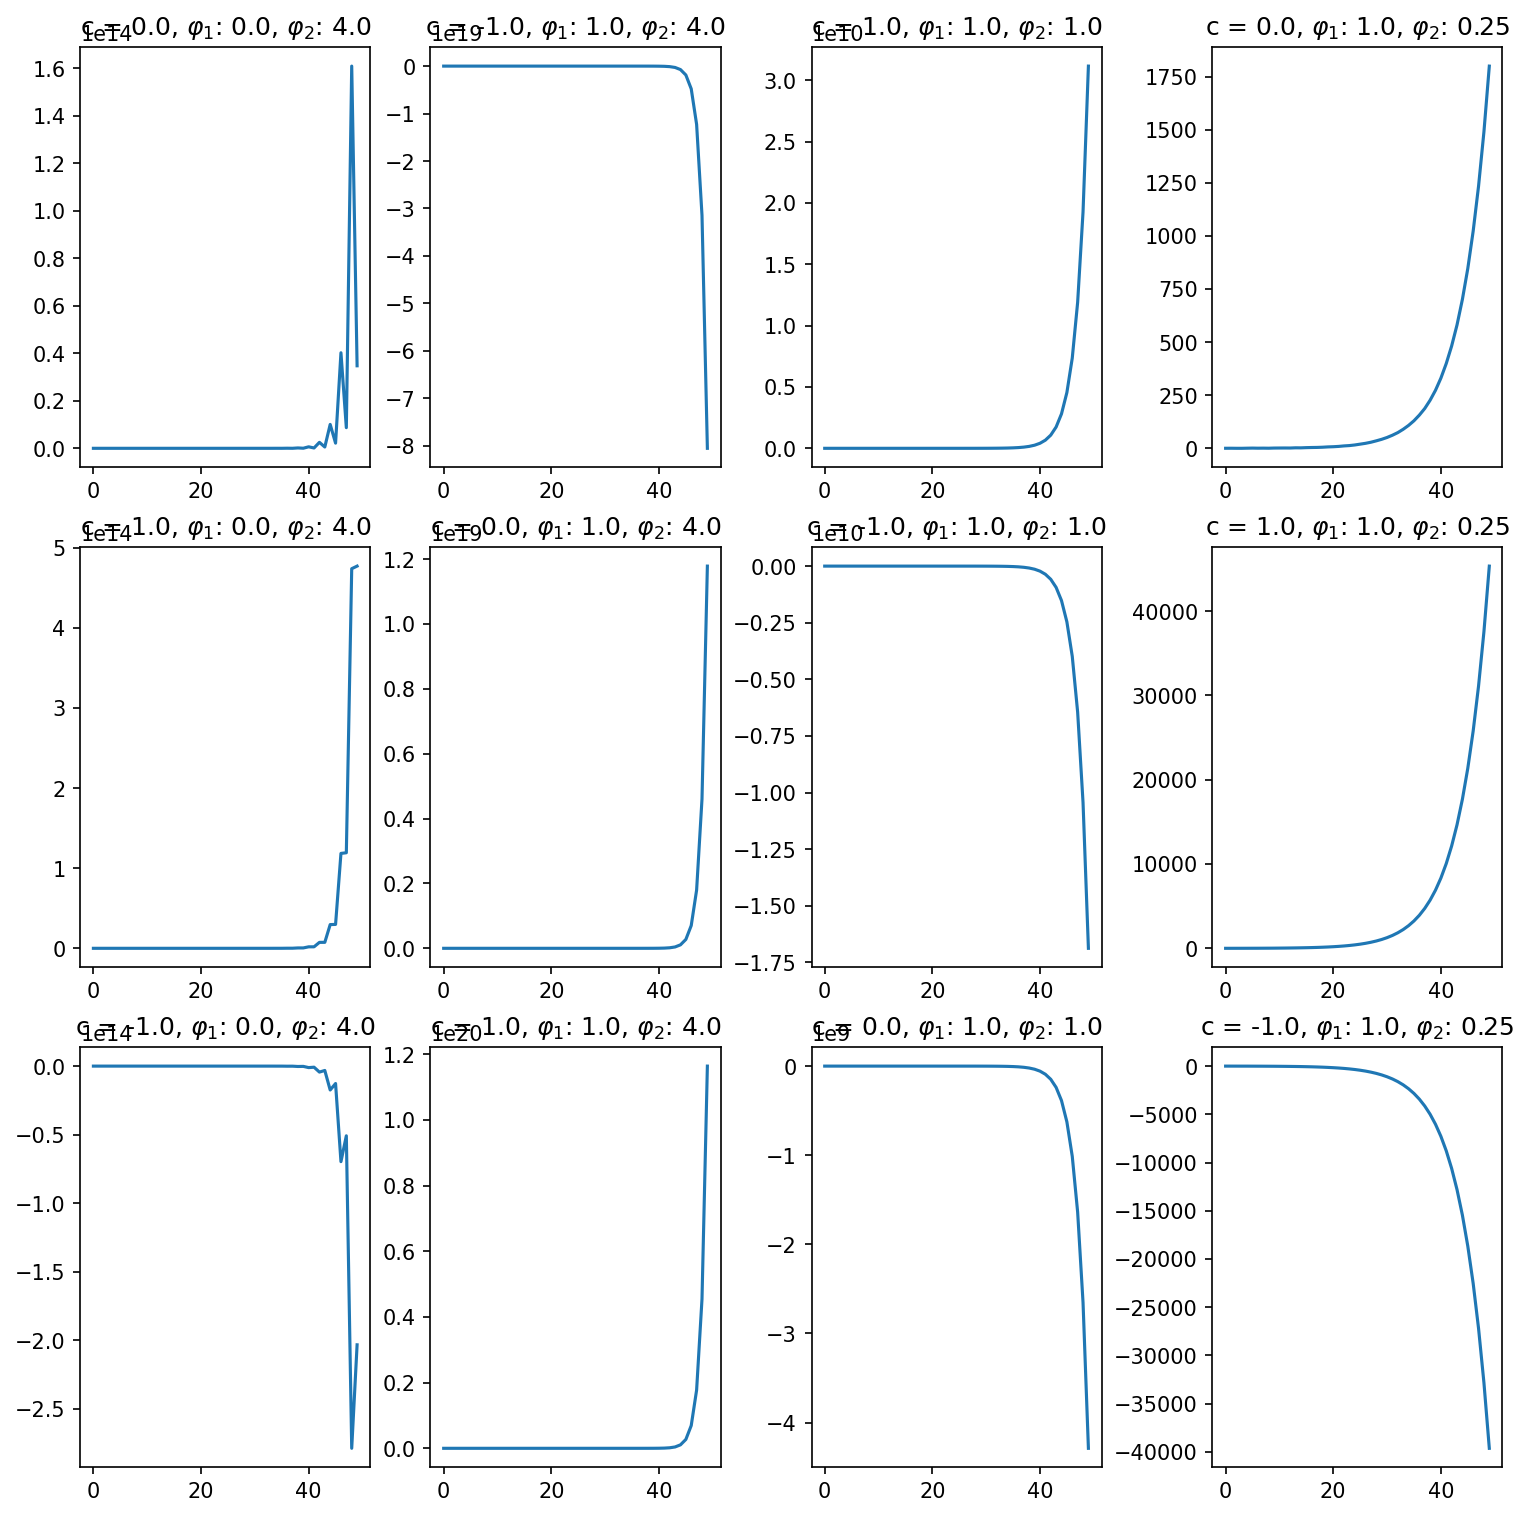

In [4]:
def problem14_7(T=50):


    combs = np.array([[0, 0, 4],
                      [0, 1, 4],
                      [0, 1, 1],
                      [0, 1, 0.25],
                      [1, 0, 4],
                      [1, 1, 4],
                      [1, 1, 1],
                      [1, 1, 0.25],
                      [-1, 0, 4],
                      [-1, 1, 4],
                      [-1, 1, 1],
                      [-1, 1, 0.25]])

    fig, axs = plt.subplots(3, 4, constrained_layout=True, figsize=(10, 10))
    fig.set_dpi(150)

    Sim = dict()

    for row in combs:
        Z = np.zeros(T)
        Z[0] = row[0] + np.random.normal(loc=0, scale=1/2.)
        Z[1] = row[0] + np.random.normal(loc=0, scale=1/2.)
        for t in range(2, T):
            Z[t] = row[0] + row[1]*Z[t-1] + row[2]*Z[t-2] + np.random.normal(loc=0, scale=1/2.)

        Sim[tuple(row)] = Z


    k = 0
    for i, key in enumerate(list(Sim.keys())):
        ax = axs[i%3, k%4]

        ax.plot(Sim[key])
        ax.set_title('c = ' + str(key[0]) + r', $\varphi_1$: ' + str(key[1]) + r', $\varphi_2$: ' + str(key[2]))
        k += 1

    plt.show()

    return
problem14_7()

## Exercise 14.8

Estimated auto covariances:
[ 0.31320525  0.13366273 -0.02620553 -0.03896863 -0.06376778 -0.06279287
 -0.05640288 -0.00652214  0.0188138  -0.00444792  0.01668745]

Calculated auto covariances:
[0.5  0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]

Estimated auto covariances:
[ 1.114675    0.22270705  0.0114343  -0.10872542 -0.1493726  -0.05846402
  0.04342685 -0.18534655 -0.11362092 -0.14755351  0.00860754]

Calculated auto covariances:
[2. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Estimated auto covariances:
[ 0.25830134  0.02331607 -0.04570632 -0.05435801 -0.08317791 -0.00939508
  0.02515689  0.09075693  0.0360806  -0.01227423 -0.0164207 ]

Calculated auto covariances:
[0.125  0.0625 0.     0.     0.     0.     0.     0.     0.     0.    ]

Estimated auto covariances:
[ 0.55247212  0.28969179 -0.04236856 -0.0601141  -0.02189805 -0.01301341
  0.07283351  0.10152052  0.0182354   0.05922446  0.14345642]

Calculated auto covariances:
[0.5  0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]

Estimated auto c

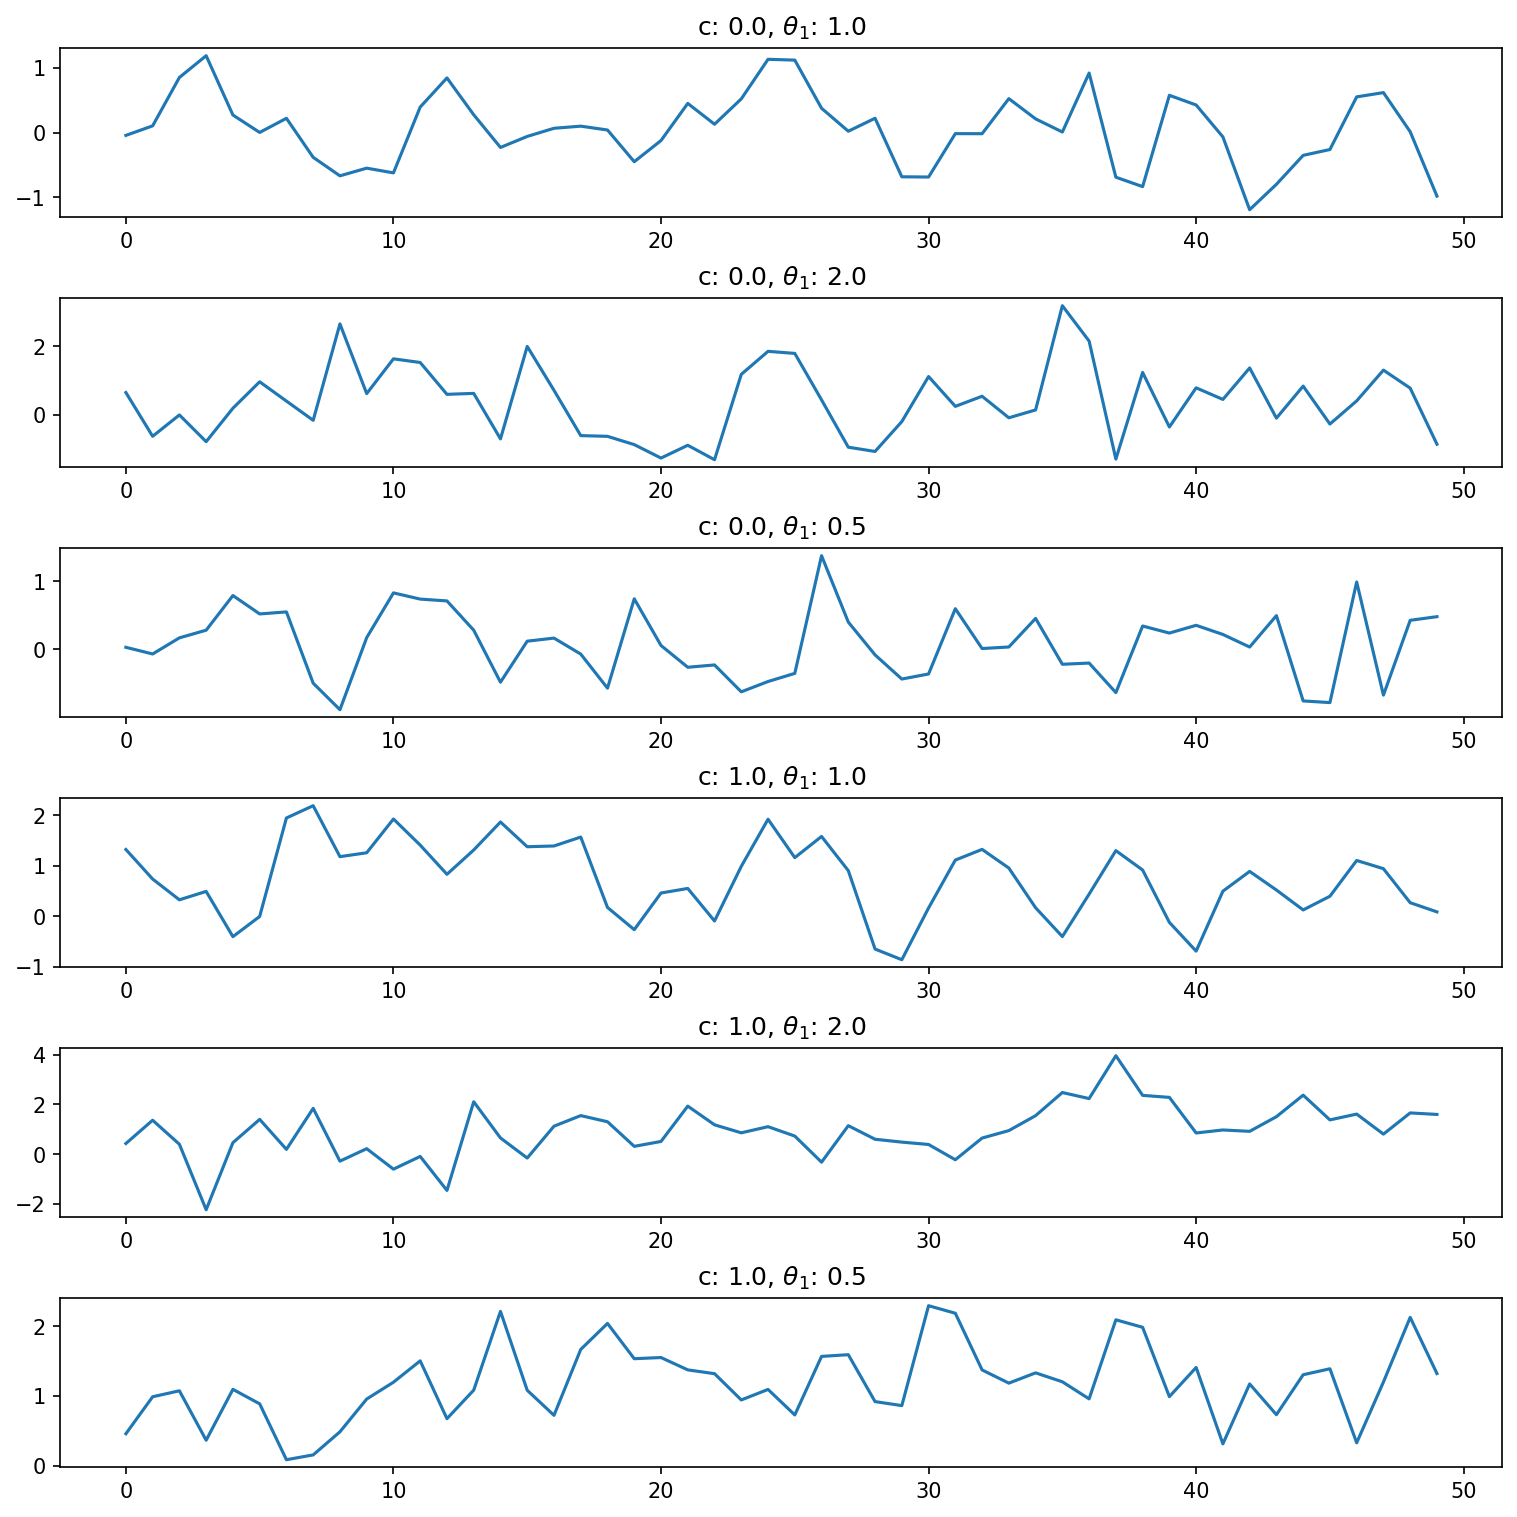

In [15]:
def problem14_8(T=50):

    combs = np.array([[0, 1],
                      [0, 2],
                      [0, 1/2.],
                      [1, 1],
                      [1, 2],
                      [1, 1/2]])
    fig, axs = plt.subplots(6, 1, constrained_layout=True, figsize=(10, 10))
    fig.set_dpi(150)

    for i, row in enumerate(combs):
        c = row[0]
        theta = row[1]
        eps0 = np.random.normal(loc=0, scale=1/2.)
        Z0 = c + np.random.normal(loc=0, scale=1/2.)
        Z = np.zeros(T)
        Z[0] = Z0
        for t in range(1, T):
            eps1 = np.random.normal(loc=0, scale=1/2.)
            Z[t] = c + eps1 + theta*eps0
            eps0 = eps1
         
        #estimate auto covariances
        estimated_auto_covariances = acovf(Z, adjusted=True, fft=False)
        
        # calculate auto covarainces from theroem 14.2.8
        calculated_auto_covarinces = np.array([np.sum([ np.inner(theta, 1/4*theta) 
                                                       for _ in range(2 - k)])
                                               if k <= 2 else 0 
                                               for k in range(0, 10) ])
        
        if i !=0:
            print()
        print('Estimated auto covariances:')
        print(estimated_auto_covariances[:11])
        print()
        print('Calculated auto covariances:')
        print(calculated_auto_covarinces)

        ax = axs[i]
        ax.plot(Z)
        ax.set_title('c: ' + str(c) + r', $\theta_1$: ' + str(theta))

    plt.show()


    return
problem14_8()

As we can see the auto covariance estimates do a pretty good job of what theorem 14.2.8 tells us they should be. Likely with a longer time series we would get better estimates. 

## Exercise 14.10

In [93]:
def problem14_10():

    #read in data frame
    PM = pd.read_csv('2015-PM2.5.csv')
    #drop first two rows
    PM = PM.drop(index=[0, 1])
    # get date time index
    date_time_index = pd.DatetimeIndex(PM.iloc[:, 0])
    # get relevatn data
    NP = PM['NP']
    # reindex
    NP.index = date_time_index
    # change to numeric data
    NP = pd.to_numeric(NP)
    # interpolate data
    NP = NP.interpolate()
    # change negative values to 0
    NP[NP.values < 0] = 0
    # add lag and constant column
    NP = pd.DataFrame({"NP": NP})
    full = NP.copy()
    full['shift-1'] = NP.shift(-1)
    full['shift-2'] = NP.shift(-2)
    full['constant'] = 1
    full.fillna(0, inplace=True)
    #get design matrix and y
    X = full[['shift-1', 'shift-2', 'constant']]
    y = full['NP']

    ols = OLS(y, X)
    results = ols.fit()

    print('Part 1:')
    print()
    print('Parameters:', results.params )
    print()
    print('R^2 value: ', results.rsquared)


    print('Part 2:')
    print()
    for j in [1, 2, 3]:
        X = np.copy(y)
        for i in range(0, j):
            delta = X[1:] - X[:-1]
            X = np.copy(delta)
        n = len(delta)
        M = np.ones((n-2, 3))
        M[:, 1] = delta[: -2]
        M[:, 2] = delta[1: -1]

        ols = OLS(delta[2:], M)
        results = ols.fit()

        print('j = ' + str(j))
        print('Parameters: ', results.params)
        print()
        print('R^2: ', results.rsquared)
        if j != 3:
            print()
            print()

    return

problem14_10()

Part 1:

Parameters: shift-1     0.812702
shift-2     0.019596
constant    1.089222
dtype: float64

R^2 value:  0.6870299642367093
Part 2:

j = 1
Parameters:  [-0.0004144  -0.22481605 -0.12773891]

R^2:  0.06083042716005049


j = 2
Parameters:  [-4.91574757e-04 -4.10908850e-01 -6.37186101e-01]

R^2:  0.3383819468961753


j = 3
Parameters:  [-2.25024728e-04 -5.30608378e-01 -9.38510457e-01]

R^2:  0.5516526892026942


In the first part we can see that the $R^2$ values is around $0.687$, which is not great.
Meaning $(z_t)$ is probably not identifiable as an $\operatorname{AR}(2)$ model.


For the second part we can see that the model is most likely non-linear since the best $R^2$ value we get is when $j=3$.